# Python EX:6(Exploratory data analysis)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('D:\Shivam\Python Ex\Ex-6\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print(df.shape)
print('-'*120)
df.head()

(7043, 21)
------------------------------------------------------------------------------------------------------------------------


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking duplicacy
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
#checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#checking special character
df.isin(['-']).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## I. What is the average tenure of customers who churn?

In [7]:
data = df[df['Churn'] == 'Yes'].groupby(['customerID','Churn']).agg({'tenure':'sum'}).reset_index()

In [8]:
data

,customerID,Churn,tenure
0,0004-TLHLJ,Yes,4
1,0011-IGKFF,Yes,13
2,0013-EXCHZ,Yes,3
3,0022-TCJCI,Yes,45
4,0023-HGHWL,Yes,1
...,...,...,...
1864,9961-JBNMK,Yes,21
1865,9965-YOKZB,Yes,9
1866,9985-MWVIX,Yes,1
1867,9986-BONCE,Yes,4


In [9]:
data['tenure'].mean()

17.979133226324237

##  II. What is the correlation between gender and churn?

In [10]:
encoder = LabelEncoder()
df['gender_'] = encoder.fit_transform(df['gender'])
df['Churn_'] = encoder.fit_transform(df['Churn'])

The correlation between gender and churn:  -0.008612095078997892
------------------------------------------------------------------------------------------------------------------------


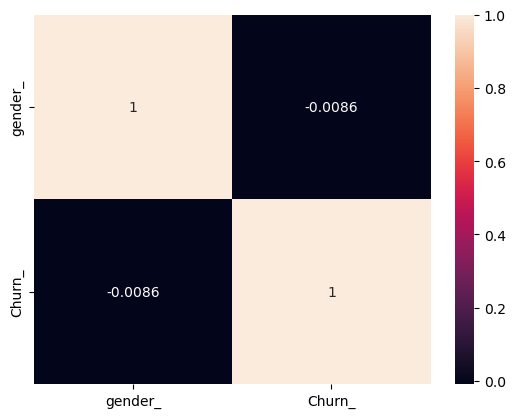

In [11]:
print('The correlation between gender and churn: ',df['gender_'].corr(df['Churn_']))
print('-'*120)
sns.heatmap(df[['gender_','Churn_']].corr(),annot=True)
plt.show()

## III. What is the difference in the average monthly charges between customers who churn and those who do not?

In [12]:
res= df[df['Churn'] == 'Yes']['MonthlyCharges'].mean() - df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print('The difference in the average monthly charges between customers who churn and those who do not: ',round(res,5))

The difference in the average monthly charges between customers who churn and those who do not:  13.17621


## IV. What are the most popular internet services usage type among customers who churn?

In [13]:
df[(df['Churn'] == 'Yes') & (df['tenure'] == df['tenure'].max())]['InternetService'].unique().tolist()

['Fiber optic', 'DSL']

## V. What is the trend in churn over time?

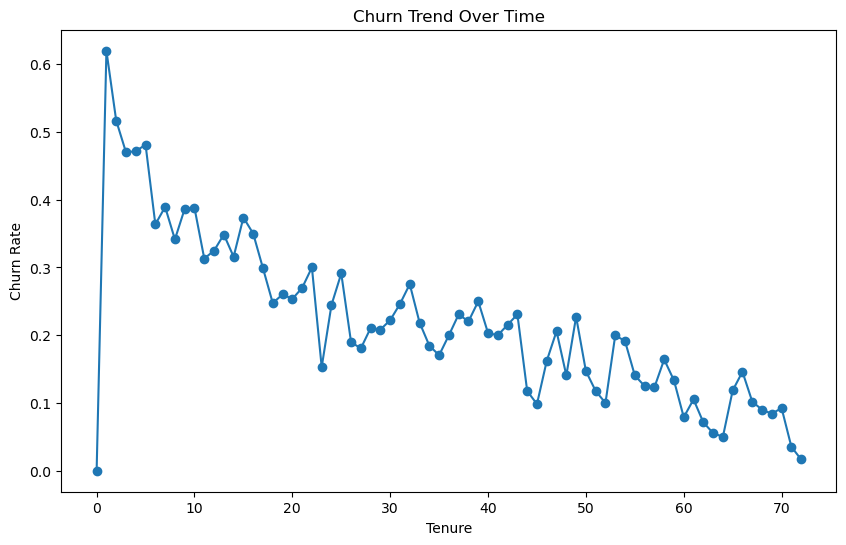

In [14]:
# Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert 'TotalCharges' to numeric

# Group by tenure
churn_by_tenure = df.groupby('tenure')['Churn_'].mean()

# Plotting the churn trend over time
plt.figure(figsize=(10, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o', linestyle='-')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Trend Over Time')
plt.show()


## VI. What are the factors that are most important in determining whether a customer will churn?

In [15]:
df.drop(columns=['Churn_','gender_'],inplace = True)

In [16]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Separate features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict churn for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



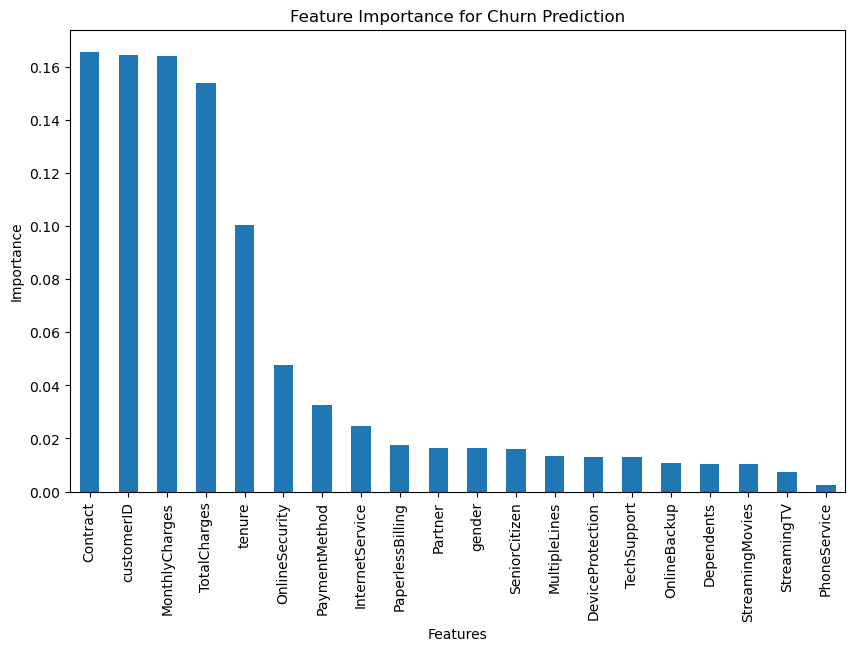

In [20]:
# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Churn Prediction')
plt.show()


### The factors that are most important in determining whether a customer will churn

In [21]:
sorted_feature_importance[sorted_feature_importance >0.02]

Contract           0.165614
customerID         0.164397
MonthlyCharges     0.163769
TotalCharges       0.153910
tenure             0.100223
OnlineSecurity     0.047781
PaymentMethod      0.032565
InternetService    0.024620
dtype: float64